In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        for i in s:
            unicodedata.numeric(i)
        return True
    except (TypeError, ValueError):
        pass
    return False

In [7]:
file_names = os.listdir('data/')
file_names

['graphsage_products_3.0_Wed_Mar_22_13:38:57_2023.csv',
 'graphsage_products_0.5_Wed_Mar_22_13:27:53_2023.csv',
 'graphsage_products_0.25_Wed_Mar_22_13:26:03_2023.csv',
 'old',
 'graphsage_products_2.0_Wed_Mar_22_13:32:26_2023.csv',
 'graphsage_products_Wed_Mar_22_12:55:35_2023.csv',
 'graphsage_products_0.25_Wed_Mar_22_13:24:21_2023.csv',
 'graphsage_products_Wed_Mar_22_12:58:37_2023.csv',
 'graphsage_products_1.0_Wed_Mar_22_14:45:55_2023.csv',
 'graphsage_products_0.25_Thu_Mar_23_09:14:03_2023.csv',
 'graphsage_products_0.5_Wed_Mar_22_13:29:47_2023.csv',
 'graphsage_papers100m_Fri_Mar_24_04:29:15_2023.csv',
 'graphsage_products_3.0_Wed_Mar_22_13:42:47_2023.csv',
 'graphsage_products_2.0_Wed_Mar_22_13:35:25_2023.csv',
 'log',
 'graphsage_ogbn-arxiv_Fri_Mar_24_09:40:11_2023.csv',
 'graphsage_products_1.0_Wed_Mar_22_14:42:40_2023.csv',
 'graphsage_products_0.25_Thu_Mar_23_09:17:03_2023.csv',
 'graphsage_products_1_Wed_Mar_22_13:04:38_2023.csv',
 'graphsage_ogbn-arxiv_0.25_Fri_Mar_24_09:

In [10]:
from collections import defaultdict
dfs = defaultdict(list)
for name in file_names:
    key = name.split('_')[:3]
    if len(key) > 1:
        if is_number(key[2]):
            dfs['_'.join(key)].append(pd.read_csv('data/' + name))
        else:
            dfs['_'.join(key[:2])].append(pd.read_csv('data/' + name))

In [11]:
dfs.keys()

dict_keys(['graphsage_products_3.0', 'graphsage_products_0.5', 'graphsage_products_0.25', 'graphsage_products_2.0', 'graphsage_products', 'graphsage_products_1.0', 'graphsage_papers100m', 'graphsage_ogbn-arxiv', 'graphsage_products_1', 'graphsage_ogbn-arxiv_0.25', 'graphsage_papers100m_0.25', 'graphsage_papers100m_0.5'])

In [12]:
def anlyze_data(dfs, epoch, prefix, title):
    plt.figure(figsize=(15, 8))
    x = range(epoch)
    keys = sorted(dfs.keys())
    for key in keys:
        if key.startswith(prefix):
            df_acc = pd.DataFrame()
            epochtrain_time = []
            presample_time = []
            e2e_time = []
            smallest_acc = 1
            largest_acc = 0
            for df in dfs[key]:
                df_acc[key] = df['acc'][:epoch]
                epochtrain_time.append(df['time/s'].mean())
                e2e_time.append(df['time/s'].sum())
                if key != prefix:
                    presample_time.append(df['presampling time/s'][0])
                smallest_acc = min(smallest_acc, df['acc'][epoch - 1])
                largest_acc = max(largest_acc, df['acc'][epoch - 1])
            mean_acc = df_acc.mean(axis=1)
            print(key)
            print('epoch train:', np.mean(epochtrain_time))
            if key != prefix:
                print('pre sample:', np.mean(presample_time))
            print('total train', np.mean(e2e_time))
            print('mean acc:', mean_acc[epoch - 1])
            print('worst acc:', smallest_acc)
            print('best acc:', largest_acc)
            print('below mean:', mean_acc[epoch - 1] - smallest_acc)
            print('above mean:', largest_acc - mean_acc[epoch - 1])
            if key == prefix:
                label = 'Online Sampling'
            else:
                label = 'Offline Sampling ({} Epoch)'.format(key.split('_')[-1])
            plt.plot(x, mean_acc, label=label)
    plt.grid(alpha=0.2)
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.legend()
    plt.show()

graphsage_ogbn-arxiv
epoch train: 1.8321492624282838
total train 91.60746312141418
mean acc: 0.6240813136100769
worst acc: 0.6240813136100769
best acc: 0.6240813136100769
below mean: 0.0
above mean: 0.0
graphsage_ogbn-arxiv_0.25
epoch train: 1.2867406368255616
pre sample: 0.4971158504486084
total train 64.33703184127808
mean acc: 0.613007128238678
worst acc: 0.613007128238678
best acc: 0.613007128238678
below mean: 0.0
above mean: 0.0


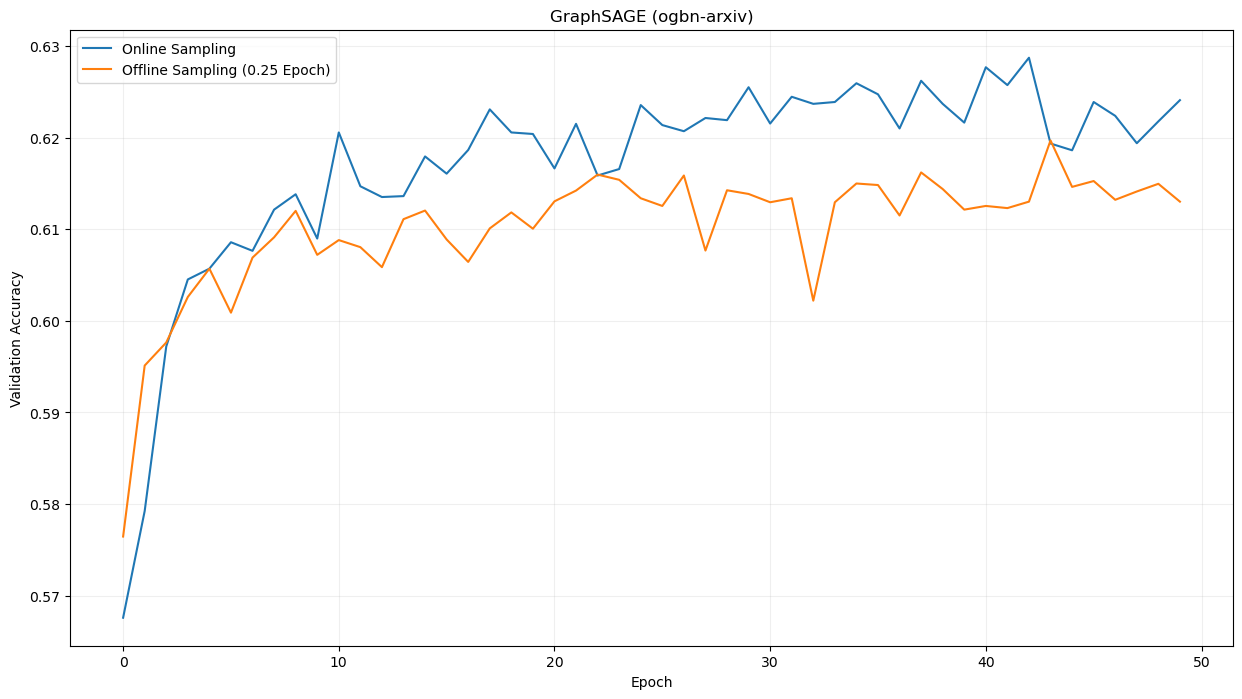

In [14]:
anlyze_data(dfs, 50, 'graphsage_ogbn-arxiv', 'GraphSAGE (ogbn-arxiv)')

graphsage_products
epoch train: 19.909339107513425
total train 995.4669553756714
mean acc: 0.9030338525772096
worst acc: 0.9027032852172852
best acc: 0.903873085975647
below mean: 0.00033056735992442743
above mean: 0.000839233398437389
graphsage_products_0.25
epoch train: 14.058418804168701
pre sample: 2.960569906234741
total train 702.920940208435
mean acc: 0.9004145264625549
worst acc: 0.8987361192703247
best acc: 0.9015080332756042
below mean: 0.0016784071922302246
above mean: 0.0010935068130493164
graphsage_products_0.5
epoch train: 16.37134275627136
pre sample: 5.612139940261841
total train 818.5671378135681
mean acc: 0.9017877578735352
worst acc: 0.9004145264625549
best acc: 0.9030847549438475
below mean: 0.0013732314109802246
above mean: 0.001296997070312389
graphsage_products_1.0
epoch train: 20.485295542716976
pre sample: 9.262406206130981
total train 1024.264777135849
mean acc: 0.9036950469017028
worst acc: 0.901050329208374
best acc: 0.9037967920303344
below mean: 0.00264471

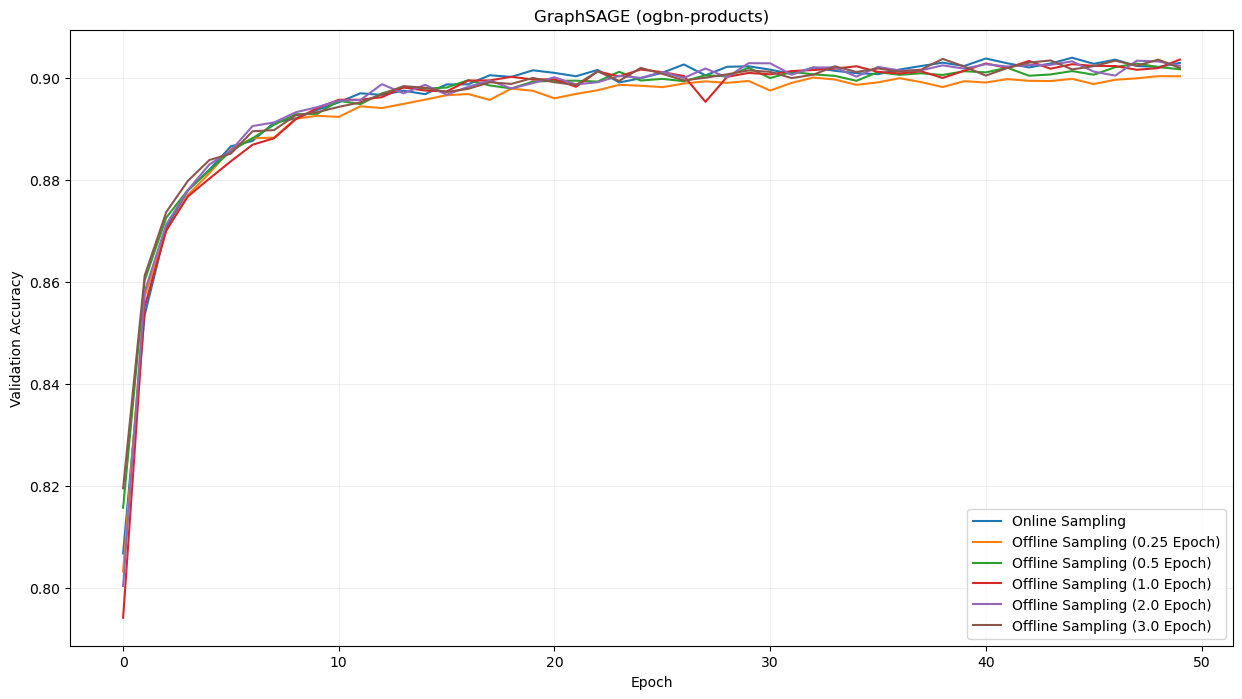

In [11]:
anlyze_data(dfs, 50, 'graphsage_products', 'GraphSAGE (ogbn-products)')

graphsage_reddit
epoch train: 33.91822147655487
total train 1695.9110738277436
mean acc: 0.9554361701011658
worst acc: 0.9554361701011658
best acc: 0.957953929901123
below mean: 0.0
above mean: 0.0025177597999572754
graphsage_reddit_0.25
epoch train: 31.548921814918522
pre sample: 2.9540177822113036
total train 1577.4460907459259
mean acc: 0.9531282782554626
worst acc: 0.948050856590271
best acc: 0.9531282782554626
below mean: 0.00507742166519165
above mean: 0.0
graphsage_reddit_0.5
epoch train: 38.771018712043755
pre sample: 6.029206132888794
total train 1938.550935602188
mean acc: 0.9542612433433532
worst acc: 0.9535478949546814
best acc: 0.9542612433433532
below mean: 0.000713348388671764
above mean: 0.0
graphsage_reddit_1.0
epoch train: 46.59458369255066
pre sample: 10.43486065864563
total train 2329.729184627533
mean acc: 0.9561076164245604
worst acc: 0.954722821712494
best acc: 0.9570727348327636
below mean: 0.0013847947120664283
above mean: 0.000965118408203125
graphsage_reddit_

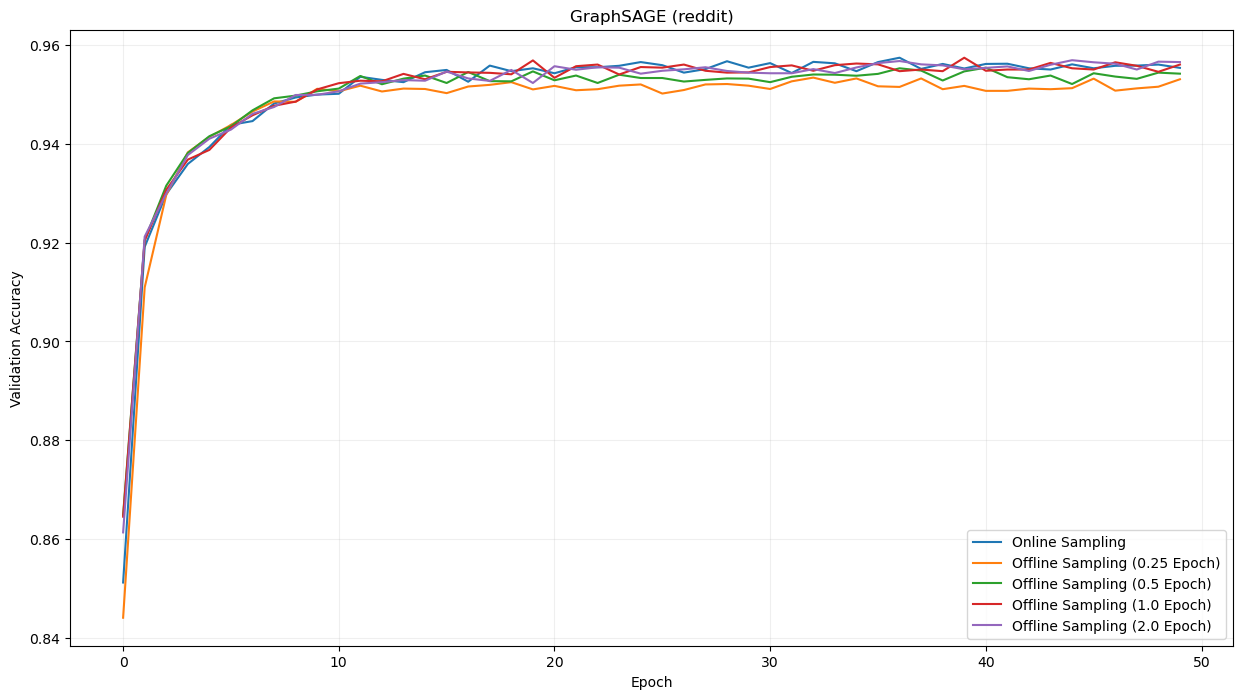

In [12]:
anlyze_data(dfs, 50, 'graphsage_reddit', 'GraphSAGE (reddit)')

ladies_products
epoch train: 9.586137237548828
total train 479.3068618774414
mean acc: 0.7647941708564758
worst acc: 0.760928750038147
best acc: 0.7647941708564758
below mean: 0.0038654208183288574
above mean: 0.0
ladies_products_0.25
epoch train: 3.8618349685668947
pre sample: 2.324791145324707
total train 193.09174842834472
mean acc: 0.7460519671440125
worst acc: 0.7440175414085388
best acc: 0.7512906193733215
below mean: 0.002034425735473633
above mean: 0.005238652229309082
ladies_products_0.5
epoch train: 3.855711505889893
pre sample: 4.691941165924073
total train 192.78557529449463
mean acc: 0.7582076787948608
worst acc: 0.7506548762321472
best acc: 0.7582076787948608
below mean: 0.007552802562713623
above mean: 0.0
ladies_products_1.0
epoch train: 3.8954258279800413
pre sample: 6.9316754817962645
total train 194.77129139900208
mean acc: 0.757037878036499
worst acc: 0.757037878036499
best acc: 0.7594792246818542
below mean: 0.0
above mean: 0.0024413466453552246
ladies_products_2.0

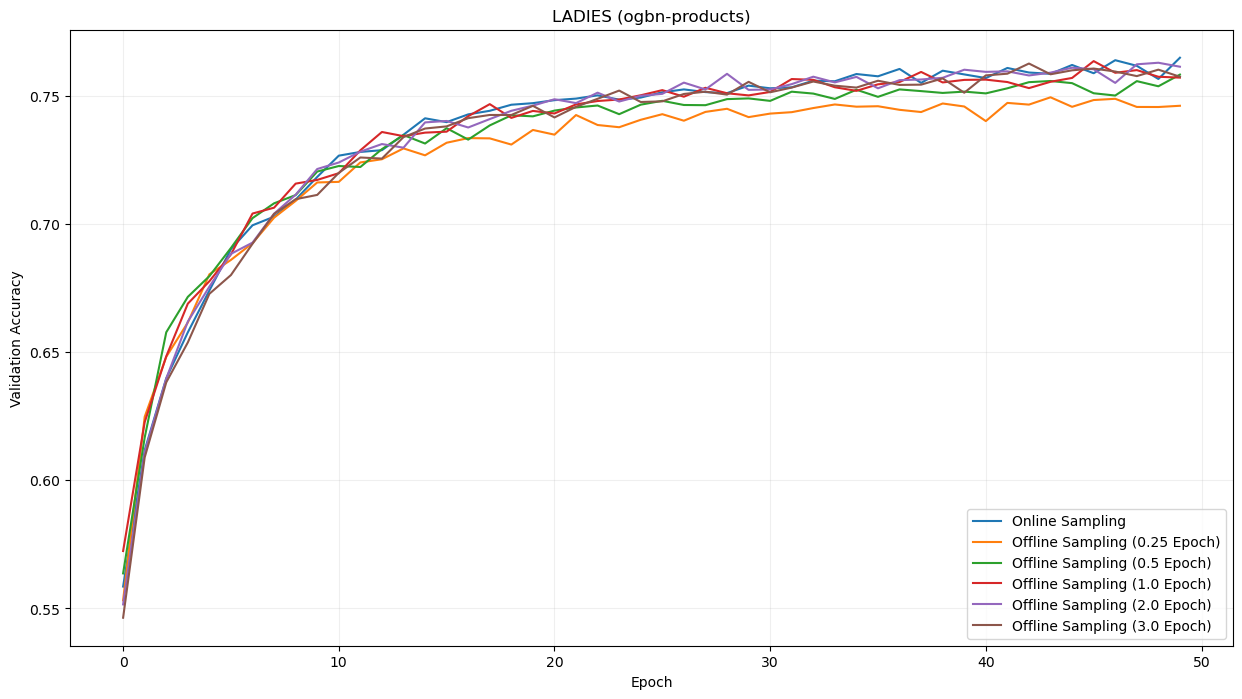

In [13]:
anlyze_data(dfs, 50, 'ladies_products', 'LADIES (ogbn-products)')

ladies_reddit
epoch train: 7.73009044456482
total train 386.50452222824094
mean acc: 0.7369392514228821
worst acc: 0.7225043177604675
best acc: 0.7369392514228821
below mean: 0.01443493366241455
above mean: 0.0
ladies_reddit_0.25
epoch train: 3.4429459266662596
pre sample: 1.7107253551483155
total train 172.147296333313
mean acc: 0.7267005443572998
worst acc: 0.7184759378433228
best acc: 0.7311484813690186
below mean: 0.00822460651397705
above mean: 0.00444793701171875
ladies_reddit_0.5
epoch train: 3.5079101667404173
pre sample: 3.6154555797576906
total train 175.39550833702089
mean acc: 0.7170912027359009
worst acc: 0.7130208611488342
best acc: 0.7226302027702332
below mean: 0.00407034158706665
above mean: 0.005539000034332275
ladies_reddit_1.0
epoch train: 3.5754211578369137
pre sample: 5.0951367855072025
total train 178.77105789184571
mean acc: 0.7202383279800415
worst acc: 0.7199026346206665
best acc: 0.7240568995475769
below mean: 0.000335693359375
above mean: 0.00381857156753540

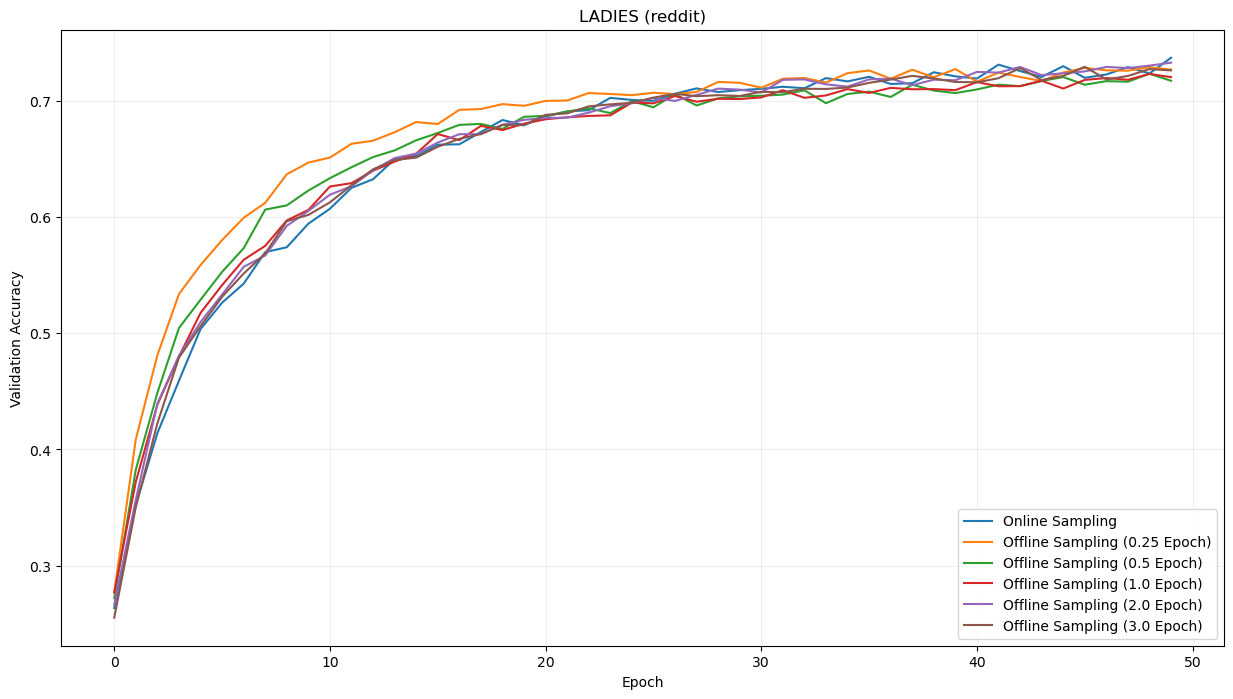

In [14]:
anlyze_data(dfs, 50, 'ladies_reddit', 'LADIES (reddit)')

In [12]:
df = pd.read_csv('data/ladies.csv')
df1 = pd.read_csv('data/ladies_1.csv')
df2 = pd.read_csv('data/ladies_2.csv')
df3 = pd.read_csv('data/ladies_3.csv')

In [26]:
df['time/s'][3:].mean()

8.631469031597705

In [27]:
df1['time/s'][3:].mean()

3.574336888942313

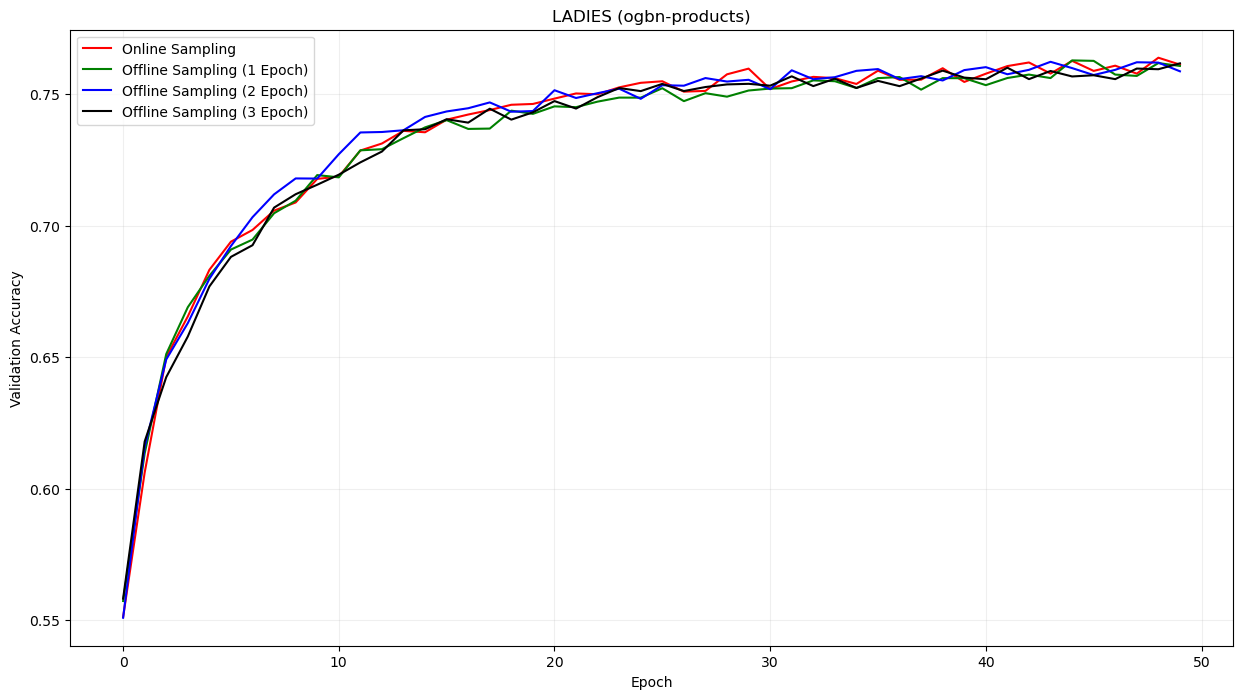

In [20]:
epoch = 50
plt.figure(figsize=(15, 8))
x = range(epoch)
plt.plot(x, df['acc'][:epoch], label='Online Sampling', color="r")
plt.plot(x, df1['acc'][:epoch], label='Offline Sampling (1 Epoch)', color="g")
plt.plot(x, df2['acc'][:epoch], label='Offline Sampling (2 Epoch)', color="b")
plt.plot(x, df3['acc'][:epoch], label='Offline Sampling (3 Epoch)', color="black")
plt.grid(alpha=0.2)
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.title('LADIES (ogbn-products)')
plt.legend()
plt.show()

In [13]:
print(df['time/s'][3:].mean())
print(df1['time/s'][3:].mean())
print(df2['time/s'][3:].mean())
print(df3['time/s'][3:].mean())

8.596044962781335
3.574336888942313
3.5794795066752334
3.5457578466293658


In [14]:
print(df1['presampling time/s'][0])
print(df2['presampling time/s'][0])
print(df3['presampling time/s'][0])

5.531052112579346
11.023811101913452
16.48173713684082


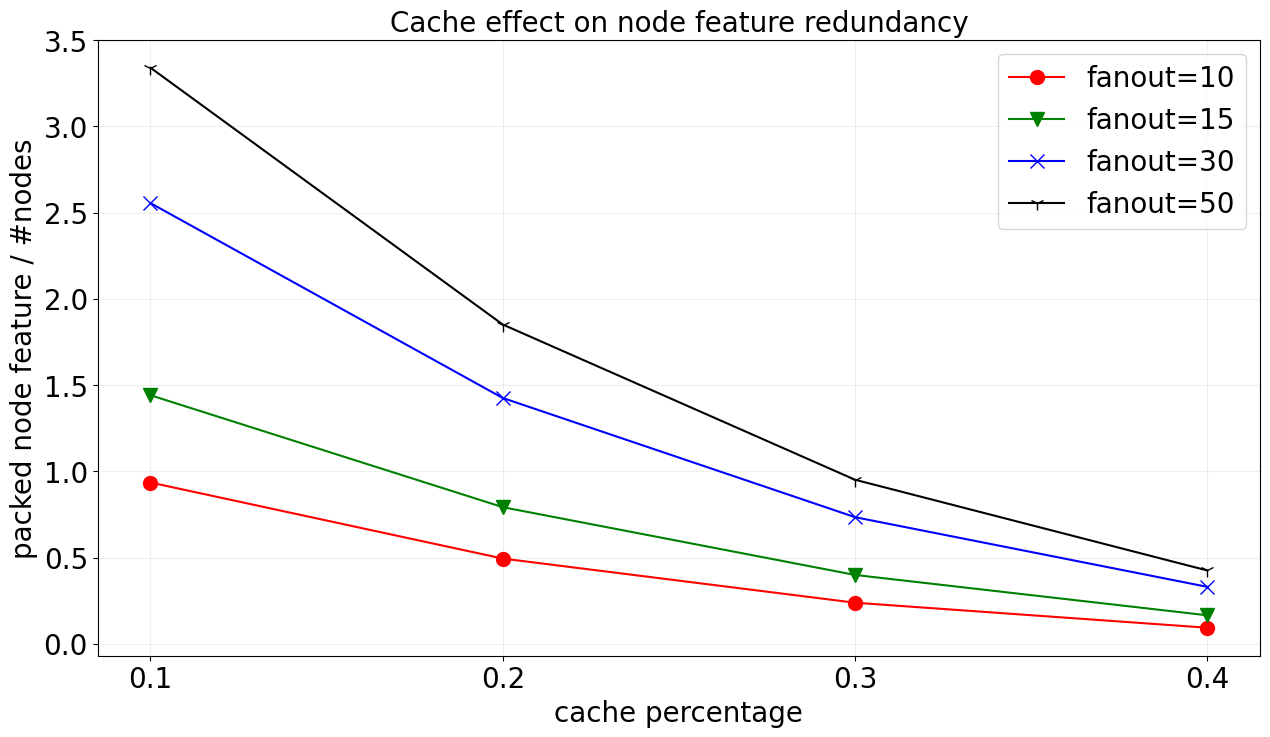

In [15]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.1, 0.2, 0.3, 0.4]
fanout_10 = [0.935, 0.494, 0.238, 0.093]
fanout_15 = [1.441, 0.792, 0.399, 0.165]
fanout_30 = [2.555, 1.425, 0.734, 0.330]
fanout_50 = [3.340, 1.851, 0.951, 0.425]
plt.plot(x, fanout_10, label='fanout=10', color="r", marker='o', markersize=marker_size)
plt.plot(x, fanout_15, label='fanout=15', color="g", marker='v', markersize=marker_size)
plt.plot(x, fanout_30, label='fanout=30', color="b", marker='x', markersize=marker_size)
plt.plot(x, fanout_50, label='fanout=50', color="black", marker='1', markersize=marker_size)
plt.grid(alpha=0.2)
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('imgs/feature_redundancy.png', bbox_inches="tight")
plt.show()

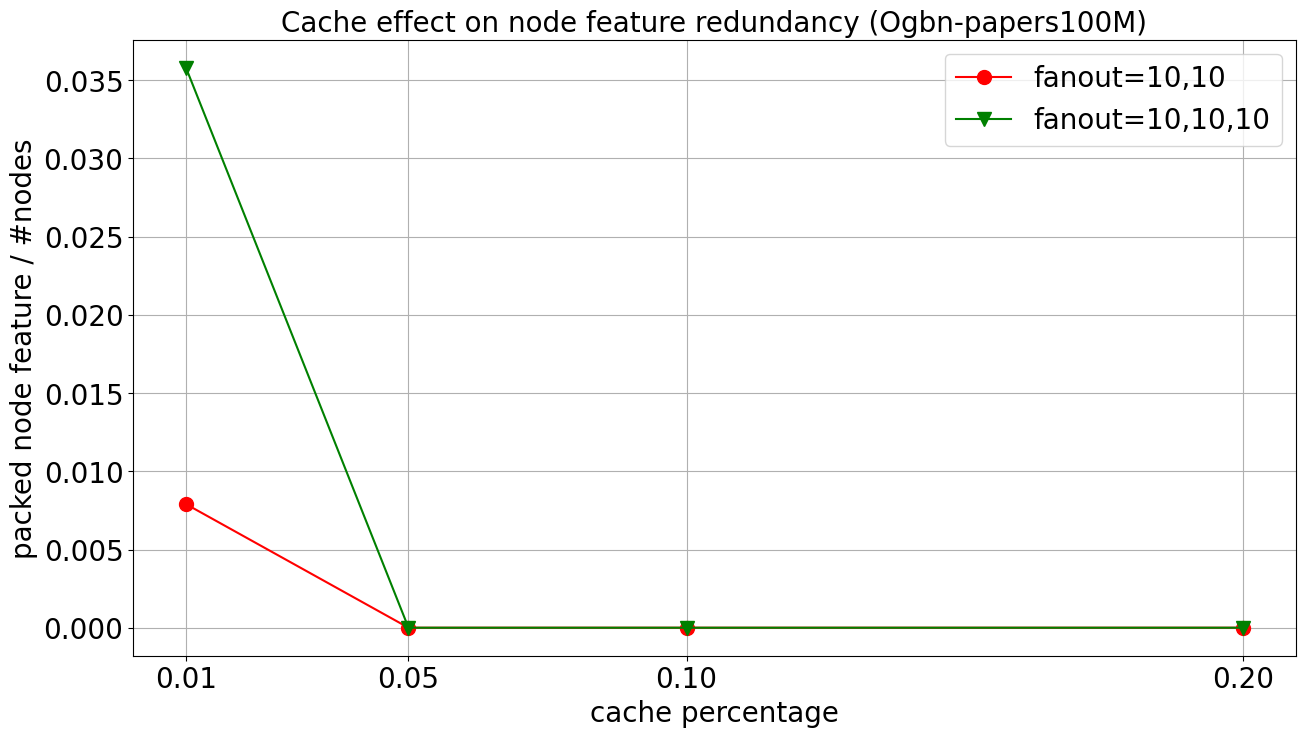

In [5]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.01, 0.05, 0.1, 0.2]
fanout_10_10 = [0.0079, 0, 0, 0]
fanout_10_10_10 = [0.0358, 0, 0, 0]
plt.plot(x, fanout_10_10, label='fanout=10,10', color="r", marker='o', markersize=marker_size)
plt.plot(x, fanout_10_10_10, label='fanout=10,10,10', color="g", marker='v', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Ogbn-papers100M)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('imgs/feature_redundancy_subgraph.png', bbox_inches="tight")
plt.show()

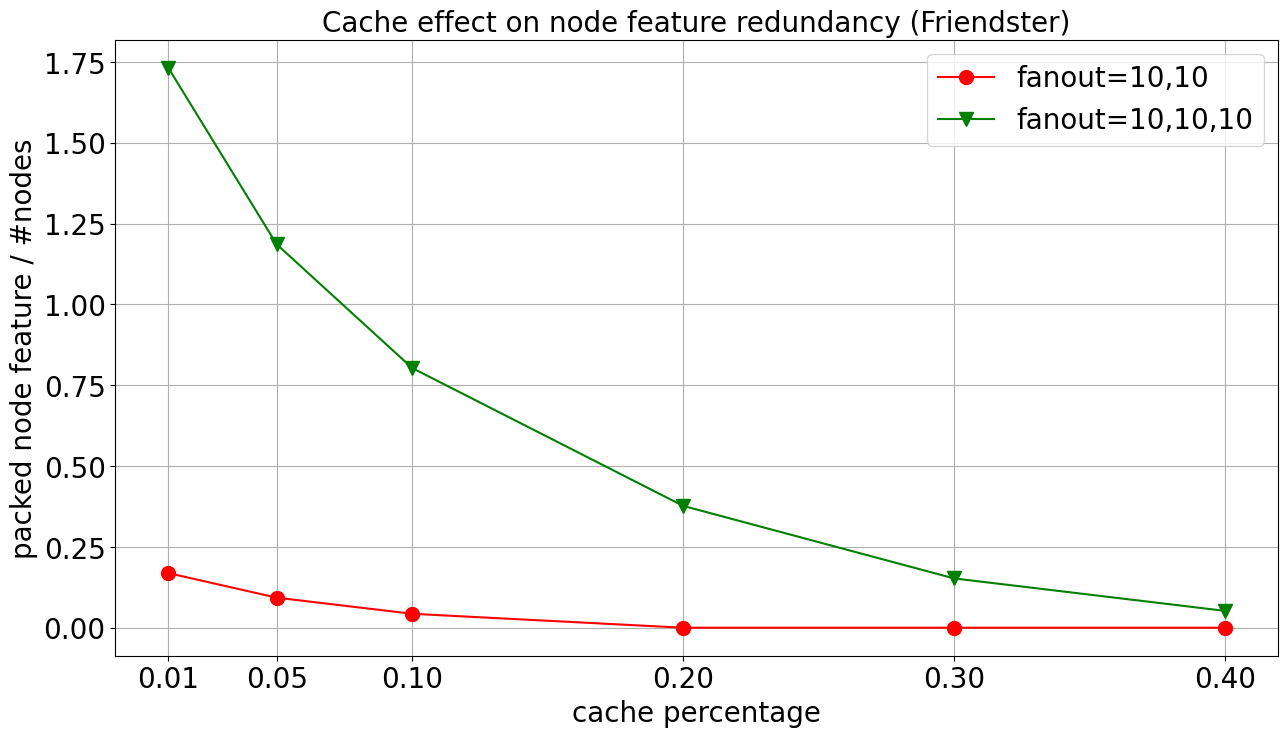

In [4]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
fanout_10_10 = [0.169, 0.093, 0.0431, 0.0, 0.0, 0.0]
fanout_10_10_10 = [1.732, 1.186, 0.8033, 0.3769, 0.1525, 0.0521]
plt.plot(x, fanout_10_10, label='fanout=10,10', color="r", marker='o', markersize=marker_size)
plt.plot(x, fanout_10_10_10, label='fanout=10,10,10', color="g", marker='v', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Friendster)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('imgs/feature_redundancy_subgraph_friendster.png', bbox_inches="tight")
plt.show()

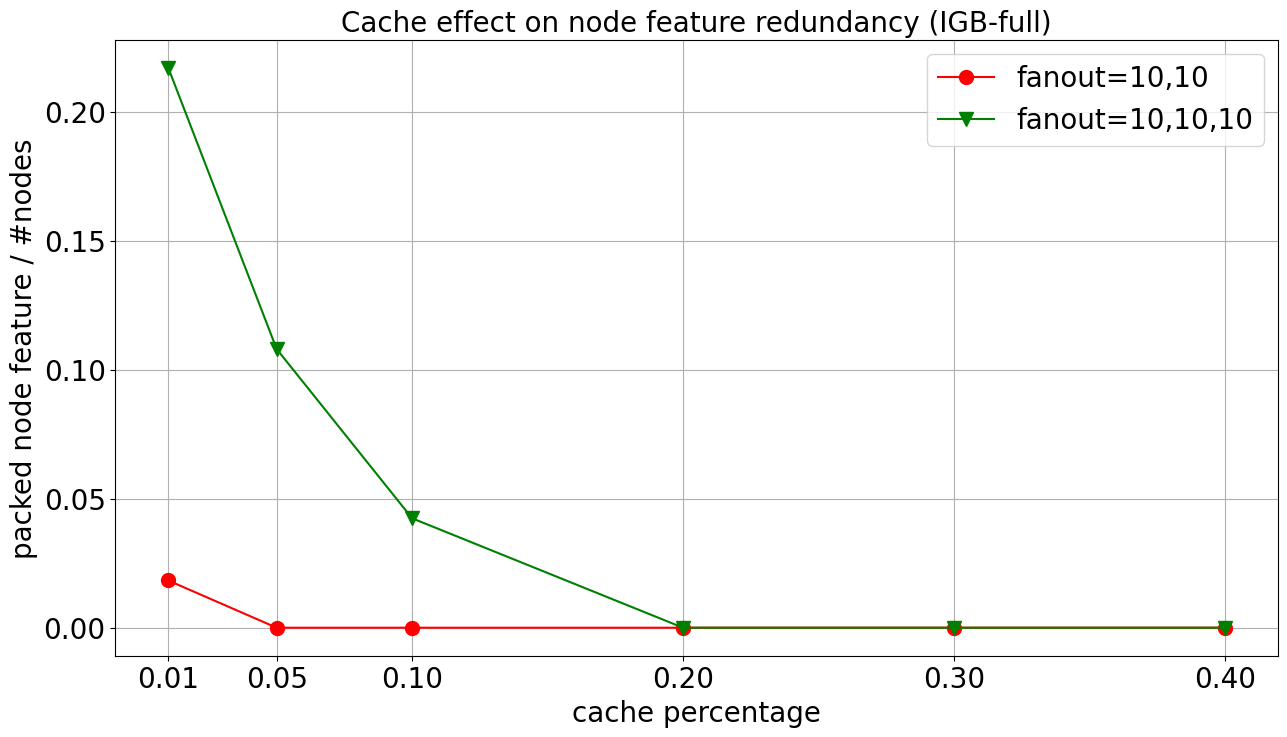

In [3]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
fanout_10_10 = [0.0183
,0.0
,0.0
,0.0
,0.0
,0.0]
fanout_10_10_10 = [0.217
,0.108
,0.0424
,0.0
,0.0
,0.0]
plt.plot(x, fanout_10_10, label='fanout=10,10', color="r", marker='o', markersize=marker_size)
plt.plot(x, fanout_10_10_10, label='fanout=10,10,10', color="g", marker='v', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (IGB-full)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('graph/imgs/feature_redundancy_subgraph_igb_full.png', bbox_inches="tight")
plt.show()

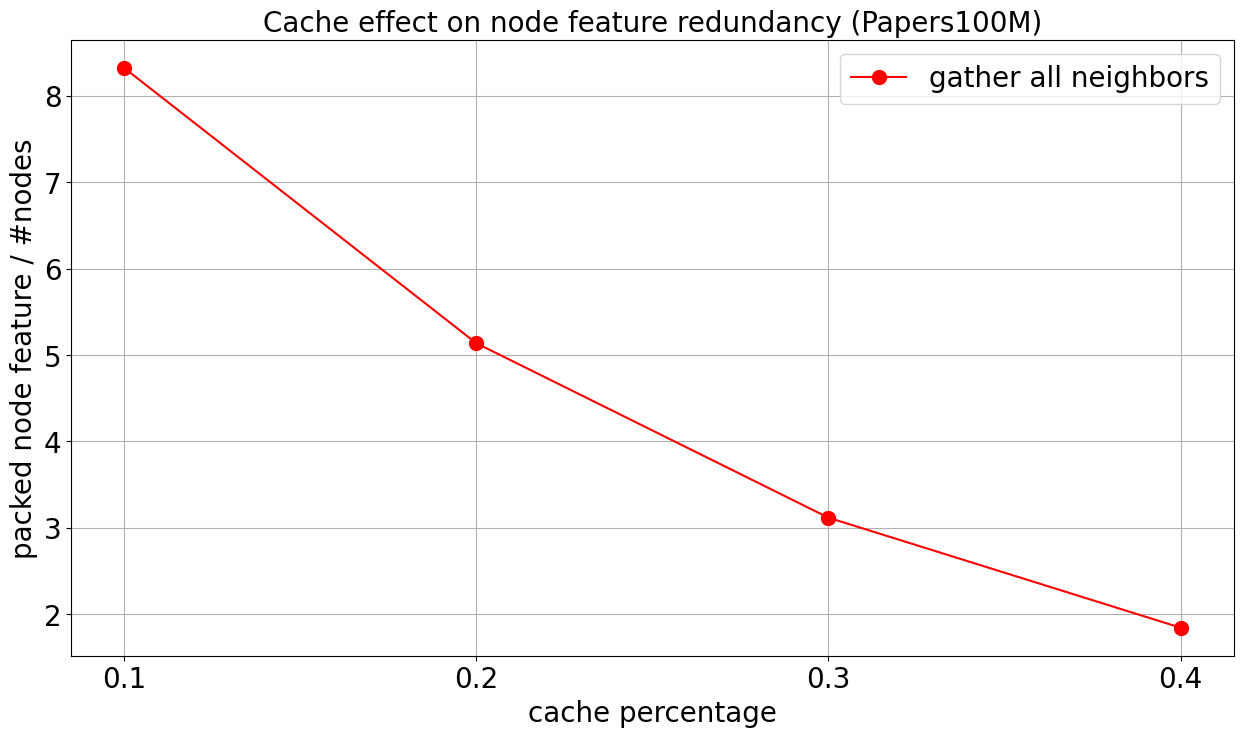

In [4]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.1, 0.2, 0.3, 0.4]
y = [8.326, 5.138, 3.117, 1.843]
plt.plot(x, y, label='gather all neighbors', color="r", marker='o', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Papers100M)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('graph/imgs/feature_redundancy_allsample_papers100M.png', bbox_inches="tight")
plt.show()

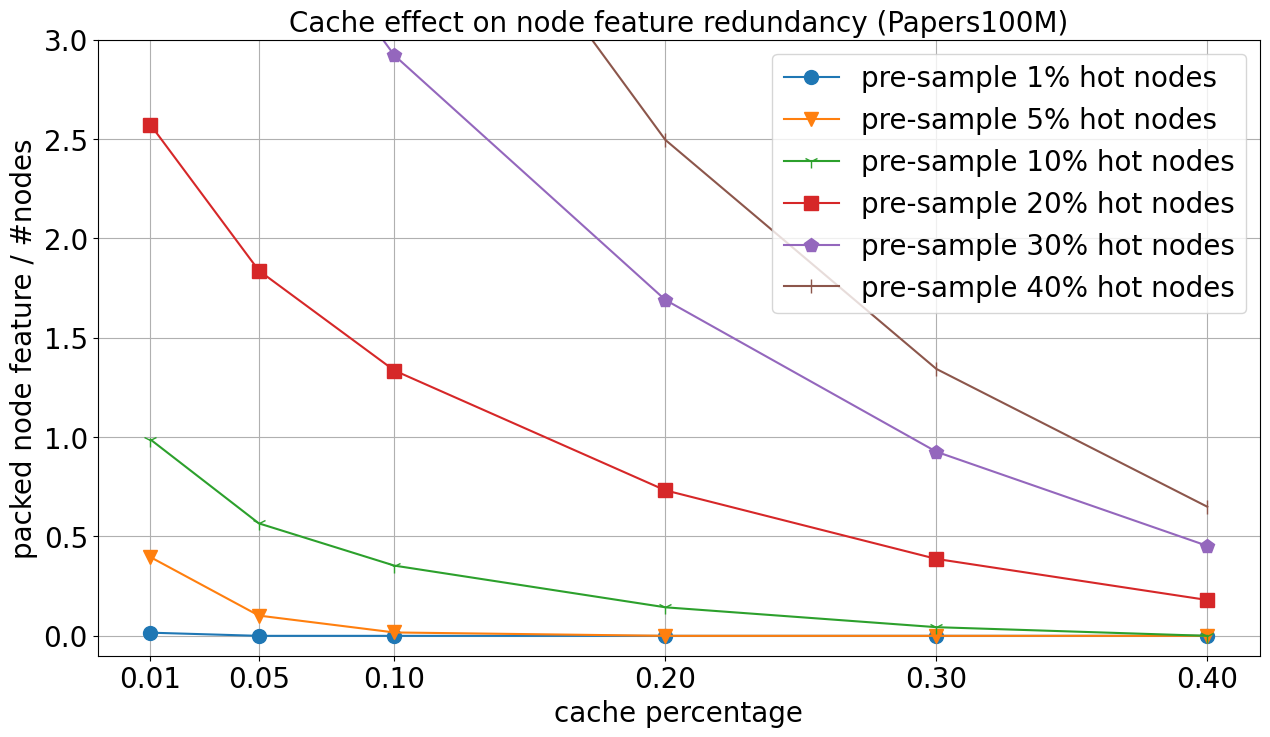

In [15]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
pre_sample_001 = [0.016, 0.0, 0.0, 0.0, 0.0, 0.0]
pre_sample_005 = [0.396
,0.102
,0.0171
,0.0
,0.0
,0.0]
pre_sample_01 = [0.988
,0.566
,0.3535
,0.1437
,0.0437
,0.0]
pre_sample_02 = [2.572
,1.838
,1.3353
,0.7324
,0.3872
,0.1804]
pre_sample_03 = [5.066
,3.855
,2.9213
,1.6906
,0.9266
,0.4528]
pre_sample_04 = [7.494
,5.748
,4.3571
,2.4959
,1.3434
,0.6497]
plt.plot(x, pre_sample_001, label='pre-sample 1% hot nodes', marker='o', markersize=marker_size)
plt.plot(x, pre_sample_005, label='pre-sample 5% hot nodes', marker='v', markersize=marker_size)
plt.plot(x, pre_sample_01, label='pre-sample 10% hot nodes', marker='1', markersize=marker_size)
plt.plot(x, pre_sample_02, label='pre-sample 20% hot nodes', marker='s', markersize=marker_size)
plt.plot(x, pre_sample_03, label='pre-sample 30% hot nodes', marker='p', markersize=marker_size)
plt.plot(x, pre_sample_04, label='pre-sample 40% hot nodes', marker='|', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim(-0.1, 3)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Papers100M)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('graph/imgs/feature_redundancy_hotnodes_allsample_papers100M.png', bbox_inches="tight")
plt.show()

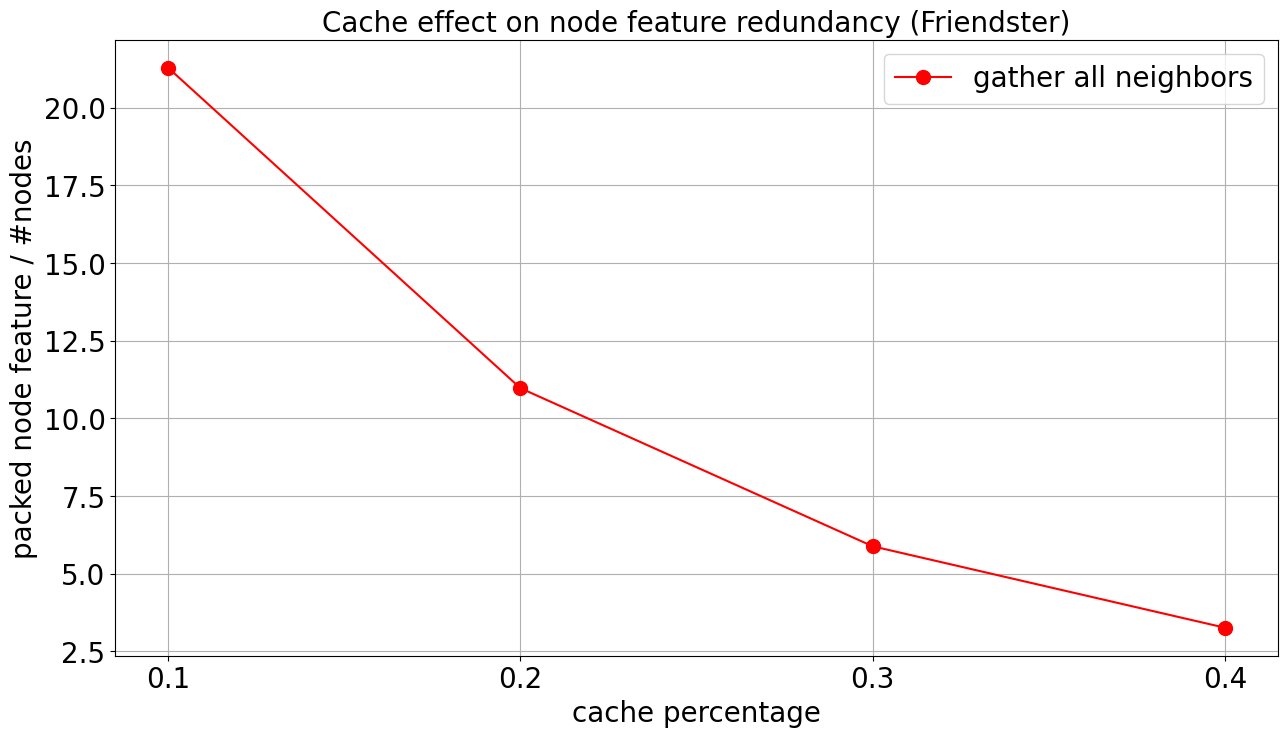

In [14]:
font_size = 20
marker_size = 10
plt.figure(figsize=(15, 8))
x = [0.1, 0.2, 0.3, 0.4]
y = [21.290
,10.973
,5.8818
,3.2594]
plt.plot(x, y, label='gather all neighbors', color="r", marker='o', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Friendster)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('graph/imgs/feature_redundancy_allsample_friendster.png', bbox_inches="tight")
plt.show()

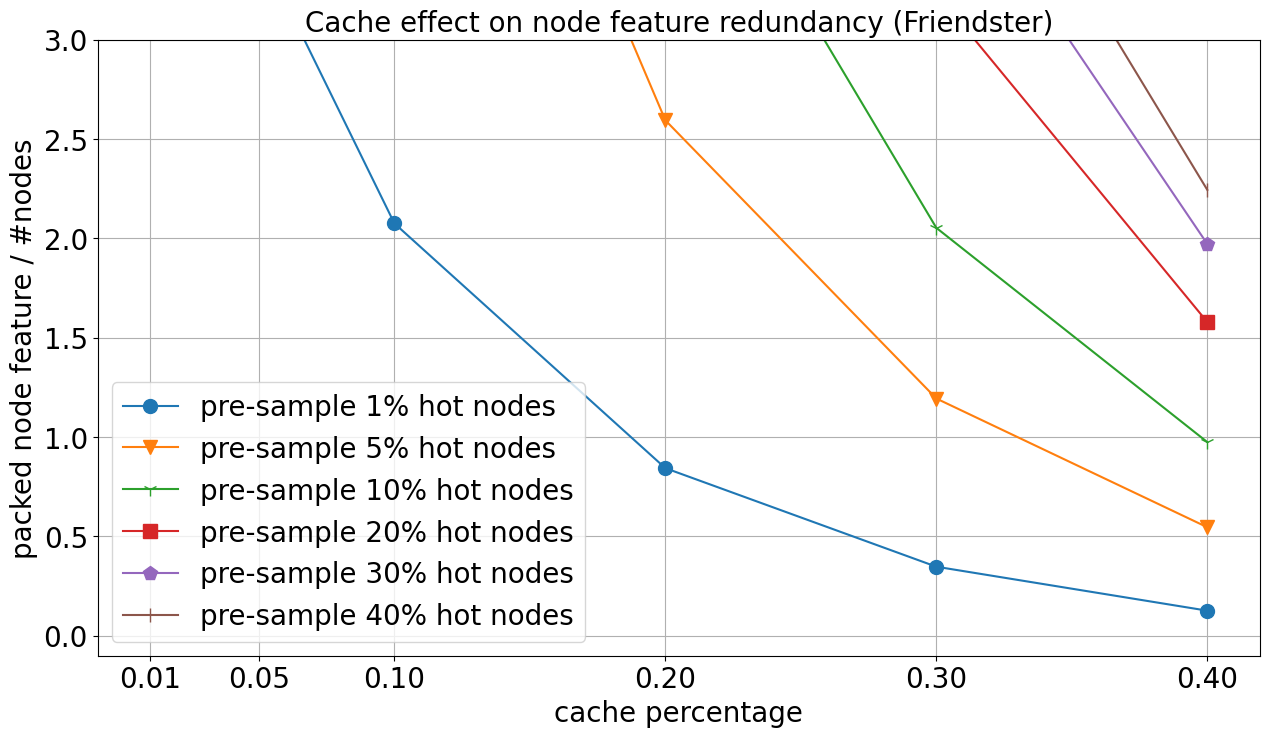

In [16]:
font_size = 20
marker_size = 10
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
pre_sample_001 = [6.148
,3.466
,2.0758
,0.8439
,0.3480
,0.1267]
pre_sample_005 = [15.03
,9.145
,5.8029
,2.5947
,1.1944
,0.5465]
pre_sample_01 = [23.148
,14.537
,9.42434
,4.34103
,2.05332
,0.97504]
pre_sample_02 = [32.948
,21.286
,14.0709
,6.66869
,3.23461
,1.57927]
pre_sample_03 = [38.251
,25.079
,16.7743
,8.10244
,3.98732
,1.97221]
pre_sample_04 = [41.189
,27.259
,18.3841
,9.01350
,4.49374
,2.24432
]
plt.figure(figsize=(15, 8))
plt.plot(x, pre_sample_001, label='pre-sample 1% hot nodes', marker='o', markersize=marker_size)
plt.plot(x, pre_sample_005, label='pre-sample 5% hot nodes', marker='v', markersize=marker_size)
plt.plot(x, pre_sample_01, label='pre-sample 10% hot nodes', marker='1', markersize=marker_size)
plt.plot(x, pre_sample_02, label='pre-sample 20% hot nodes', marker='s', markersize=marker_size)
plt.plot(x, pre_sample_03, label='pre-sample 30% hot nodes', marker='p', markersize=marker_size)
plt.plot(x, pre_sample_04, label='pre-sample 40% hot nodes', marker='|', markersize=marker_size)
plt.grid()
plt.xticks(x, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim(-0.1, 3)
plt.ylabel('packed node feature / #nodes', fontsize=font_size)
plt.xlabel('cache percentage', fontsize=font_size)
plt.title('Cache effect on node feature redundancy (Friendster)', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.savefig('graph/imgs/feature_redundancy_hotnodes_allsample_friendster.png', bbox_inches="tight")
plt.show()